In [1]:
import agent
import gym
import matplotlib.pyplot as plt

### Environnement

In [2]:
env = gym.make('MountainCar-v0')

### Agent

In [3]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.01,
    'num_action': env.action_space.n,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
q_learning_agent = agent.QLearningAgent(agent_init)

### RUN

In [5]:
timesteps_per_episode = list()
rewards_per_episode = list()
epoch_size = 50
n_episode = 1000
t_max_per_episode = 1000
verbose = False

In [6]:
assert n_episode % epoch_size == 0, f"epoch_size ({epoch_size}) must be a divisor of n_episode ({n_episode})"

for i_episode in range(n_episode):
    state = env.reset()
    rewards = 0
    
    for t in range(t_max_per_episode):
        if verbose:
            env.render()
        action = q_learning_agent.choose_action(state)
        state, reward, done, info = env.step(action)
        q_learning_agent.update(state, reward, done)
        rewards += reward
        if done:
            break
    if i_episode % epoch_size == 0:
        print(i_episode)
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
env.close()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


### ANALYSIS

In [7]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

array([198.36, 198.08, 197.76, 198.24, 199.  , 199.  , 197.26, 197.62,
       198.46, 197.76, 199.  , 197.78, 198.32, 198.14, 198.58, 198.34,
       198.32, 198.08, 199.  , 198.8 ])

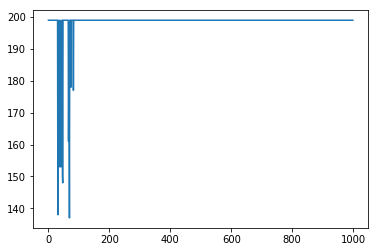

In [8]:
plt.plot(range(n_episode), timesteps_per_episode)

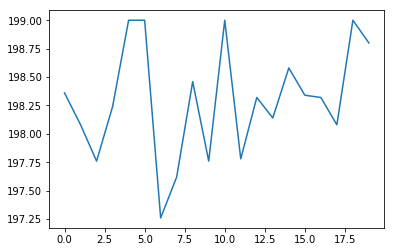

In [9]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

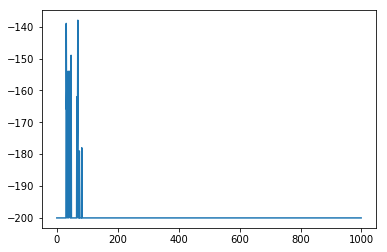

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)